# AVALIACAO FINAL

### EXERCICIO 1

Considere o código a seguir para gerar os dados. Qual o grau do melhor polinômio ajustado? 

Use o erro quadrático médio como medida de avaliação. Considere o código desenvolvido na aula 2.



In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [3]:
np.random.seed(10)
#função para gerar os dados
def function(x):
    y = x**4 + x**9
    return y

In [6]:
# training set
N_train = 20
sigma = 0.3
x_train= np.linspace(0, 1,N_train)
y_train = function(x_train) + np.random.normal(0,sigma, N_train)
x_train = x_train.reshape(len(x_train), 1)



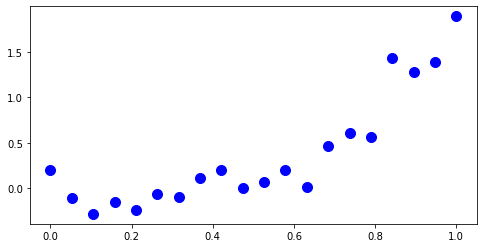

In [7]:
fig = plt.figure(figsize=(8, 4))
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b",
            s=100, label="training data")

In [8]:
# test set
N_test = 20
x_test=np.linspace(0, 1,N_test)
y_test = function(x_test) +  np.random.normal(0,sigma, N_test)
x_test = x_test.reshape(len(x_test), 1)

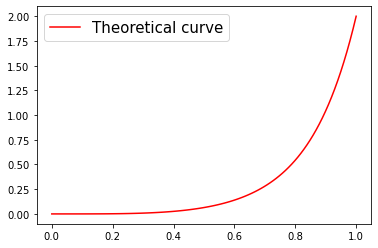

In [9]:
# Curva teorica
xt = np.linspace(0,1,100)
yt = function(xt)
plt.plot(xt,yt, '-r',  label="Theoretical curve")
plt.legend(fontsize=15)
plt.show(True)

In [10]:
#Funcao para calcular o erro quadrático médio
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

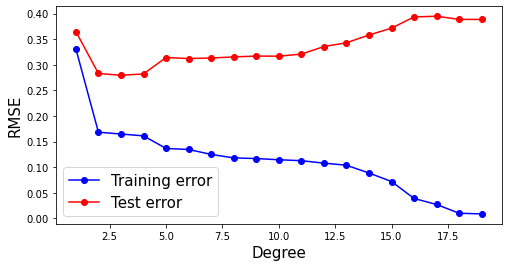

O menor RMSE para Test Set é =  0.27961300096607783 no polinômio =  3


In [34]:
# lista que armazena os erros de acordo com o grau do polinomio
training_errors = []
test_errors = []
degree = [] # armazena os graus do polinomio
for M in np.arange(1,20):   
    # modelo a ser usado: regressão linear
    model = linear_model.LinearRegression()
    # transforma os dados para obter a matriz onde cada coluna i armazena x**i
    poly = PolynomialFeatures(degree=M) 
    X_train = poly.fit_transform(x_train)
    # realiza a regressão linear no conjunto de treinamento
    model.fit(X_train,y_train)
    Y_pred = model.predict(X_train)
    error_train = rmse(Y_pred,y_train)
    training_errors.append(error_train)

    # realiza a regressão linear no conjunto de teste
    X_test=poly.fit_transform(x_test)
    Y_pred2 = model.predict(X_test)
    error_test = rmse(Y_pred2, y_test)
    test_errors.append(error_test)
    degree.append(M)



fig = plt.figure(figsize=(8, 4))
plt.plot(degree, training_errors, 'b-o', label = 'Training error')
plt.plot(degree, test_errors, 'r-o', label= 'Test error')
plt.xlabel("Degree", fontsize = 15)
plt.ylabel("RMSE", fontsize = 15)
plt.legend(fontsize = 15)
plt.show(True)

print('O menor RMSE para Test Set é = ', min(test_errors), 'no polinômio = ', test_errors.index(min(test_errors))+1)


### EXERCICIO 2

Considere o código abaixo para gerar os dados. Usando o método k-means com 3 clusters, qual o valor da medida "Mutual information score"?



In [36]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score, mutual_info_score
import numpy as np
np.random.seed(10)

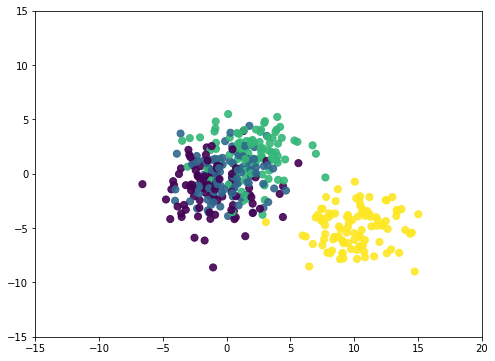

In [39]:
n_samples = 100

c = [(-1, -1), (0, 0), (2, 2),(10,-5)]
n=400 #número de pontos
data = make_blobs(n_samples=n, n_features=2, centers=c, cluster_std=2, random_state=50)
X = data[0]
y = data[1]

# mostra os dados
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.9)
plt.xlim(-15,20)
plt.ylim(-15,15)
plt.show(True)

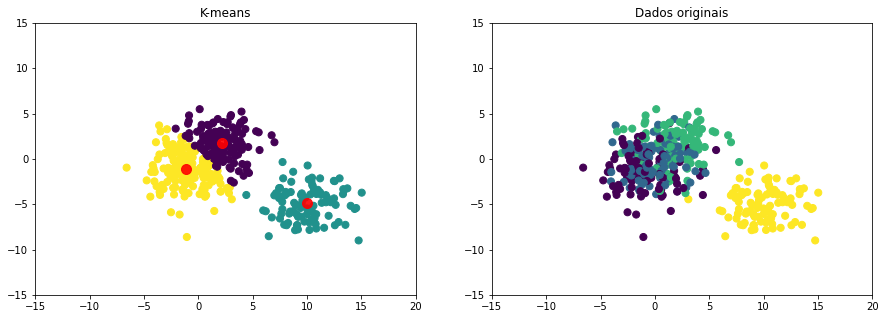

In [41]:
from sklearn.cluster import KMeans

k = 3 

# define o método com k clusters
kmeans = KMeans(n_clusters=k) 
# realiza o ajuste considerando os dados X
kmeans.fit(X)

# faz a predição, identificando os clusters
y_km = kmeans.fit_predict(X)

# define o tamanha da figura
plt.figure(figsize=(15,5))

# mostra o primeiro gráfico
plt.subplot(1, 2, 1)
plt.scatter(X[:,0], X[:,1], c=y_km, cmap='viridis', s=50)
plt.xlim(-15,20)
plt.ylim(-15,15)
plt.title('K-means')

centers = kmeans.cluster_centers_
# mostra os centróides obtidos
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.9); 

# mostra o segundo gráfico
plt.subplot(1,2, 2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50)
plt.xlim(-15,20)
plt.ylim(-15,15)
plt.title('Dados originais')
plt.show(True)

In [46]:
print('K-means:')
print('Adjusted rand score:', "{0:.2f}".format(adjusted_rand_score(y_km, data[1])))
print('Mutual information score:', "{0:.2f}".format(mutual_info_score(y_km, data[1])))
print('\n')

K-means:
Adjusted rand score: 0.47
Mutual information score: 0.67




In [47]:
print('K-means:')
print('Adjusted rand score:', adjusted_rand_score(y_km, data[1]))
print('Mutual information score:', mutual_info_score(y_km, data[1]))
print('\n')

K-means:
Adjusted rand score: 0.46620844006134715
Mutual information score: 0.665922592907087




### EXERCICIO 3

Quais as variáveis que mais influenciam o preço de imóveis em Boston usando Lasso. Considere alpha = 0.1. Use a função Lasso com os hiperparâmetros:


In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

np.random.seed(10)

In [73]:
# leitura dos dados
data = pd.read_csv('data/BostonHousing.csv', header=(0))
# remove nan (Not a Number)
data = data.dropna()
data = data.drop(data.columns[[0]], axis=1) # remove the first column (if useless)
# define a variável de saída
ylabel = data.columns[-1]
attributes = data.columns

In [74]:
print('Número de observações e atributos:',data.shape)
list_labels = list(data.columns)
data.head(10)

Número de observações e atributos: (506, 13)


,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [75]:
# Converte os dados para numpy para facilitar a manipulação
datanp = data.to_numpy()
nrow,ncol = datanp.shape
y = datanp[:,-1]
X = datanp[:,0:ncol-1]

In [76]:
# Split the data into training and testing sets
p = 0.3 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

In [77]:
alpha = 0.1
# notice that we need to normalize the attributes: normalize = True

lasso = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
lasso.fit(x_train, y_train)             # Fit a ridge regression on the training data
y_pred = lasso.predict(x_test)           # Use this model to predict the test data
RSME = mean_squared_error(y_test, y_pred)         # Calculate the test MSE
print('RSME:', RSME)

RSME: 30.176132464923153


In [78]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print("R2:", R2)  

R2: 0.5950224288099999


In [79]:
lasso = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
lasso.fit(x_train, y_train)             # Fit a ridge regression on the training data
print('Coeficientes: ')
lasso.coef_

Coeficientes: 


array([ 0.        , -0.        ,  0.        , -0.        ,  3.18851141,
       -0.        , -0.        , -0.        , -0.        , -0.30668633,
        0.        , -0.48666629])

In [80]:
print(attributes)

Index(['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


### EXERCICIO 4

Qual o valor da acurácia calculada na base water_potability usando o classificador NaiveBayes?



In [83]:
import random
random.seed(42) # define the seed (important to reproduce the results)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [84]:
np.random.seed(10)

data = pd.read_csv('data/water_potability.csv', header=(0))
data = data.dropna(axis='rows') #remove NaN
# armazena os nomes das classes
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str) 

In [85]:
print("Número de linhas e colunas na matriz de atributos:", data.shape)
attributes = list(data.columns)
data.head(10)

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

from sklearn.model_selection import train_test_split
p = 0.2 # fraction of elements in the training set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p)

Número de linhas e colunas na matriz de atributos: (2011, 10)


In [90]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('Accuracy: ', "{0:.1f}".format(model.score(x_test, y_test)))

Accuracy:  0.6


In [91]:
from sklearn.naive_bayes import BernoulliNB
# Usamos a função BernoulliNB para realizar a classificação usando a distribuição de Bernoulli
model = BernoulliNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('Accuracy: ', "{0:.1f}".format(model.score(x_test, y_test)))

Accuracy:  0.6
